# Protein Structure Alignment

An interesting application of rotational Procrustes is to align two 
protein structures in three-dimensional coordinates. Protein structure alignment is one of the fundamental problems in structural biology and structured-based drug design. A well-known structure alignment method is the Kabsch algorithm, which involves three steps: (1) translation of the structures to have a common centroid, (2) 
computation of the coordinate covariance matrix, and (3) finding the optimal rotation matrix. This is simply a rotational Procrustes problem.

In this example, we are going to use rotational Procrustes, which has been implemented `procrustes.rotational`.

We will use the human deoyhemoglobin X-ray crystal structure as an 
example (PDB ID: 2HHB), which allows comparison to the  BiomolecularStructures package (https://github.com/hng/BiomolecularStructures.jl). 
The structure has cyclic-C2 global symmetry, where chain A (magenta)
and chain C (green) are hemoglobin (deoxy) alpha chains, and chain B and D are hemoglobin deoxy beta chains. 
The rotational-orthogonal Procrustes will be used to align the Cα atoms in different chains of the protein.

In [ ]:
# only run this cell if you need to install the dependices

# procrustes
!pip install git+https://github.com/theochem/procrustes.git@master
# biopython
!pip install biopython

In [1]:
import numpy as np
from Bio.PDB import PDBParser
from procrustes import rotational

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In order to compare the differences between chain A and chain C. 
A function is built to extract the Cα coordinates and another function 
is designed to calculate the RMSD values. 

In [2]:
def get_coordinates(file_name, pdb_id, chain_id):
  r"""
  Build alpha carbon coordinates matrix from PDB file.

  Parameters
  ----------
  file_name : string
      PDB file name.
  pdb_id : string
      PDB ID.
  chain_id : string
      Chain ID. Possible inputs can be any of 'A', 'B', 'C', et al., if it exists in the protein.

  Returns
  -------
  matrix : float
      3D coordinates of the assigned PDB structure.
  """

  # permissive parser
  p = PDBParser(PERMISSIVE=1)
  structure = p.get_structure(pdb_id, file_name)
  # get X-ray crystal structure
  coordinates = []
  chain = structure[0][chain_id]

  for residue in chain:
      for atom in residue:
          # Using residue['CA'] results in error
          if atom.get_id() == 'CA':
              coordinates += list(atom.get_vector())
  matrix = np.asarray(coordinates).reshape(-1, 3)

  return matrix

The PDBConstructionWarning warnings will not have side effects on
extracting the coordinates. Then we define another function to calculate the root mean squared derivation (RMSD) values for two molecular coordinates.

In [3]:
# the coordinates of C_alpha atoms in chain A
coord_A = get_coordinates("../examples/protein_alignment/2hhb.pdb",
                         pdb_id="2hhb",
                         chain_id="A")
print(coord_A)

[[  6.86999989  17.7840004    4.70200014]
 [ 10.59899998  17.91399956   4.15299988]
 [ 12.28600025  19.77400017   7.03399992]
 [ 15.28499985  22.04199982   6.16699982]
 [ 17.53300095  19.41500092   7.65100002]
 [ 15.94900036  16.87299919   5.23099995]
 [ 16.74799919  19.22200012   2.352     ]
 [ 20.35199928  19.57799911   3.477     ]
 [ 20.65600014  15.77700043   3.68899989]
 [ 19.21100044  15.13199997   0.21699999]
 [ 21.4279995   17.87299919  -1.33000004]
 [ 24.45299911  16.45400047   0.234     ]
 [ 23.83499908  12.90100002  -0.73799998]
 [ 22.74500084  13.64299965  -4.27199984]
 [ 25.71299934  15.95800018  -4.56400013]
 [ 27.90200043  12.86900043  -3.99799991]
 [ 25.87199974  10.98400021  -6.58599997]
 [ 26.9279995   13.67500019  -9.02499962]
 [ 27.75099945  12.27499962 -12.38399982]
 [ 26.76499939   8.68599987 -11.74400043]
 [ 23.16399956   9.74800014 -11.52700043]
 [ 22.2159996    8.06299973 -14.75399971]
 [ 24.1060009    4.83400011 -14.08500004]
 [ 22.44799995   4.69199991 -10.66

/home/legend/softs/miniconda3/envs/PA_py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5037.
  PDBConstructionWarning,
/home/legend/softs/miniconda3/envs/PA_py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5080.
  PDBConstructionWarning,
/home/legend/softs/miniconda3/envs/PA_py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5124.
  PDBConstructionWarning,
/home/legend/softs/miniconda3/envs/PA_py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5167.
  PDBConstructionWarning,
/home/legend/softs/miniconda3/envs/PA_py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5211.
  PDBConstructionWarn

In [4]:
# the coordinates of C_alpha atoms in chain C
coord_C = get_coordinates("../examples/protein_alignment/2hhb.pdb",
                         pdb_id="2hhb",
                         chain_id="C")
print(coord_C)

[[-7.25699997e+00  1.78129997e+01 -4.80499983e+00]
 [-1.09309998e+01  1.83700008e+01 -4.34600019e+00]
 [-1.26859999e+01  2.01070004e+01 -7.22900009e+00]
 [-1.57229996e+01  2.22830009e+01 -6.50199986e+00]
 [-1.78160000e+01  1.94360008e+01 -7.79099989e+00]
 [-1.61299992e+01  1.70330009e+01 -5.39400005e+00]
 [-1.68770008e+01  1.94249992e+01 -2.51699996e+00]
 [-2.04710007e+01  1.97199993e+01 -3.54299998e+00]
 [-2.06889992e+01  1.58809996e+01 -3.76399994e+00]
 [-1.92070007e+01  1.54060001e+01 -3.68000001e-01]
 [-2.14050007e+01  1.80650005e+01  1.37000000e+00]
 [-2.44060001e+01  1.65639992e+01 -2.28000000e-01]
 [-2.36639996e+01  1.29829998e+01  7.45000005e-01]
 [-2.25149994e+01  1.37910004e+01  4.27600002e+00]
 [-2.55699997e+01  1.60349998e+01  4.59399986e+00]
 [-2.79169998e+01  1.30629997e+01  3.99000001e+00]
 [-2.58719997e+01  1.12089996e+01  6.63700008e+00]
 [-2.67999992e+01  1.38830004e+01  9.08800030e+00]
 [-2.77469997e+01  1.25109997e+01  1.24010000e+01]
 [-2.68010006e+01  8.83800030e+

/home/legend/softs/miniconda3/envs/PA_py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5037.
  PDBConstructionWarning,
/home/legend/softs/miniconda3/envs/PA_py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5080.
  PDBConstructionWarning,
/home/legend/softs/miniconda3/envs/PA_py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5124.
  PDBConstructionWarning,
/home/legend/softs/miniconda3/envs/PA_py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5167.
  PDBConstructionWarning,
/home/legend/softs/miniconda3/envs/PA_py37/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5211.
  PDBConstructionWarn

In [5]:
def compute_rmsd(A, B):
 r"""
 Calculate root mean square deviation (RMSD).

 Parameters
 ----------
 A : ndarray
 B : ndarray

 Returns
 -------
 rmsd : float
     RMSD value of A and B.
 """

 # Check if A and B are with the same dimension
 if A.shape != B.shape:
     raise ValueError("INput matrices must be with the same shape\
                      for rmsd calculations.")
 D = len(A[0, :])
 N = len(A[:, 0])

 # Compute rmsd
 rmsd = 0.0
 for a, b in zip(A, B):
     rmsd += sum([(a[i] - b[i])**2.0 for i in range(D)])
 return np.sqrt(rmsd/N)

Root-mean-square deviation (RMSD) is a used to assess the 
discrepancy between structures, and was calculated before and after superposition translation and rotation operations were performed by rotational orthogonal Procrustes. The RMSD values before alignment is calculated as 39.5 Å, reaffirming that chain A and chain C are far
away from each other. 

In [6]:
rmsd_before = compute_rmsd(coord_A, coord_C)

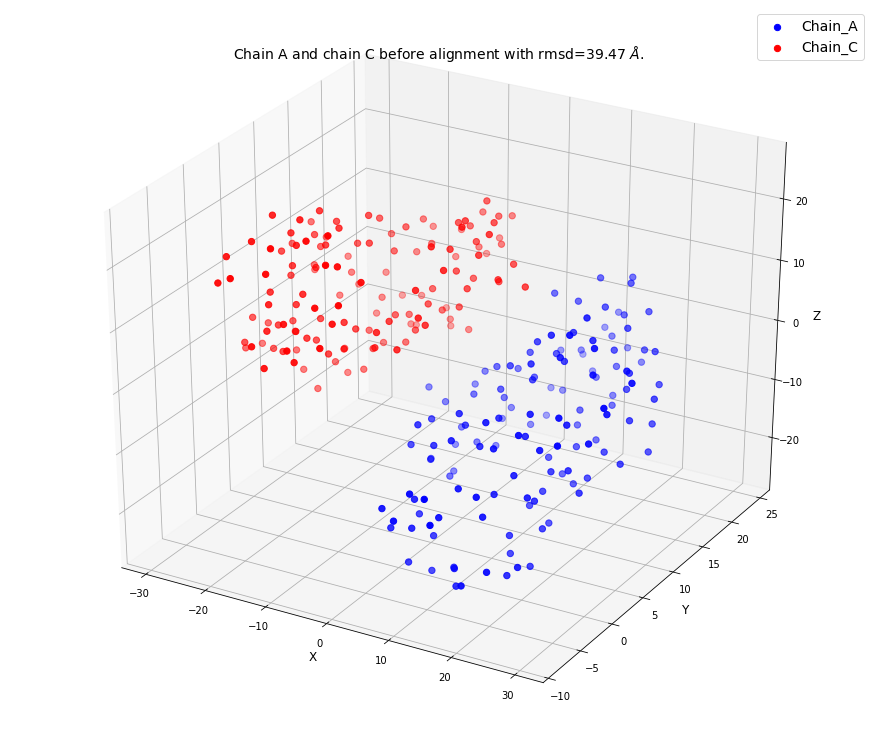

In [7]:
# plot the coordinates
fig = plt.figure(figsize=(12, 10))
ax = Axes3D(fig)

ax.scatter(xs=coord_A[:, 0], ys=coord_A[:, 1], zs=coord_A[:, 2], 
           marker="o", color="blue", s=40, label="Chain_A")
ax.scatter(xs=coord_C[:, 0], ys=coord_C[:, 1], zs=coord_C[:, 2], 
           marker="o", color="red", s=40, label="Chain_C")

ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.set_zlabel('Z', fontsize=12)
ax.legend(fontsize=14, loc='best')

plt.title("Chain A and chain C before alignment with rmsd={:0.2f} $\AA$.".format(rmsd_before),
          fontsize=14)
plt.show()

# if you want to save the figure, uncomment next line
# plt.savefig('before_align.png', dpi=300)

Now, we use rotational Procrustes to perform the structure alignment.

In [8]:
res = rotational(coord_A, coord_C,
                 remove_zero_col=False,
                 remove_zero_row=False,
                 translate=True)

In [9]:
# now new_A is the array after rotation
new_A_transformed = np.dot(res["new_a"], res["array_u"])

rmsd_after = compute_rmsd(new_A_transformed, res["new_b"])
print(rmsd_after)

0.2300387105661849


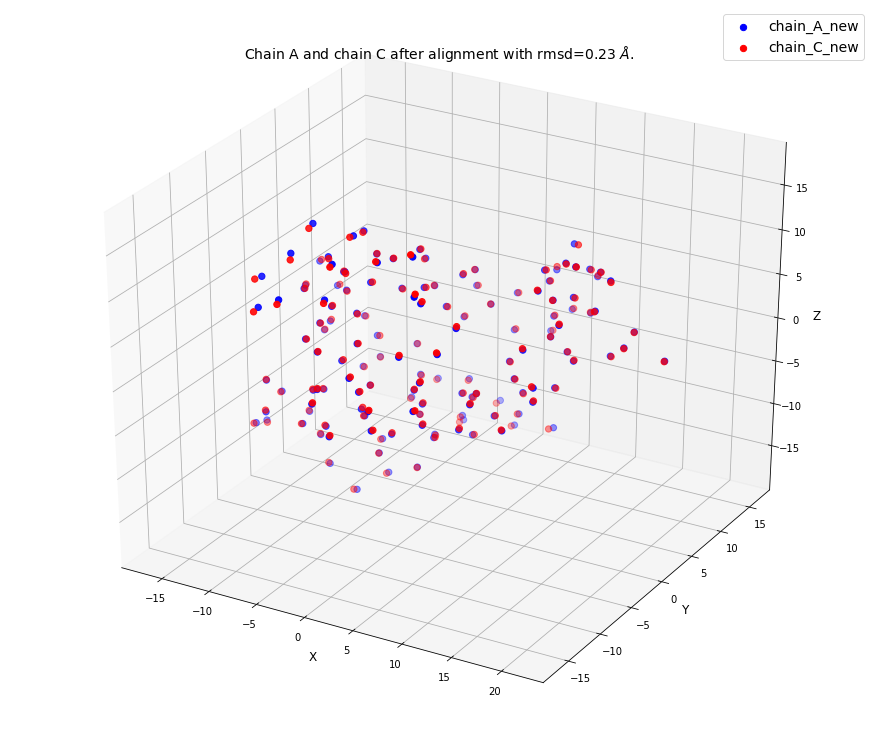

In [10]:
# plot the coordinates after alignment
fig = plt.figure(figsize=(12, 10))
ax = Axes3D(fig)
# ax = fig.add_subplot(111, projection='3d')

ax.scatter(new_A_transformed[:,0], new_A_transformed[:,1], new_A_transformed[:,2], 
           zdir='z', s=40, c='blue', label='chain_A_new')
ax.scatter(new_C[:,0], new_C[:,1], new_C[:,2], 
           zdir='z', s=40, c='red', label='chain_C_new')

ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.set_zlabel('Z', fontsize=12)
ax.legend(fontsize=14, loc='best')

plt.title("Chain A and chain C after alignment with rmsd={:0.2f} $\AA$.".format(rmsd_after),
          fontsize=14)
plt.show()
# if you want to save the figure, uncomment next line
# plt.savefig('after_align.png', dpi=300)

All the Cα atoms become close to each other after to
translation and rotation (the above figure) with rmsd value 0.23 $\unicode{x212B}$. This affirms that the utility of rotationalorthogonal Procrustes in protein alignment.